**Mathematical Foundations for Computer Vision and Machine Learning**

*** Assignment05 - Computation of Image Features using Convolution ***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment05)

# Setting up

Input image is read to the program by ```io.imread``` having ```0-255``` value for each pixels.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import sys

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image) # 0-255
im_gray  	= color.rgb2gray(im_color) # 0-1


# Visualize input image for color/gray

Image can be shown by ```plt.imshow()``` . The ```cmap``` attribute indicates the colormap of the picture. There are lots of selections in colormap.

[Colormap in matplotlib](https://matplotlib.org/users/colormaps.html)

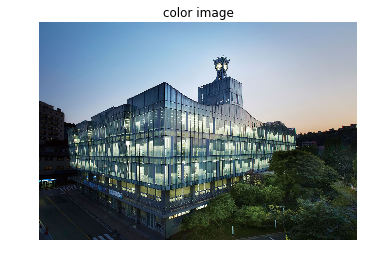

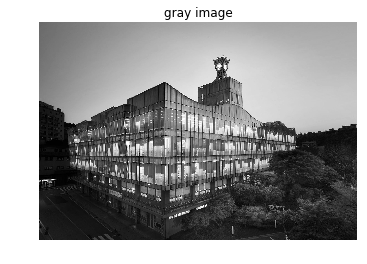

In [2]:
# Print input image
plt.title('color image')
plt.imshow(im_color)
plt.axis('off')
plt.show()
plt.title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.show()

# Define Essential Functions

I define some funtions that is essential to implement this program.


## Definition of Derivative

In this assignment, derivative of the image is defined as 

$$ f'(x) = \frac{f(x+1)-f(x)}{1-0} $$

```compute_x_derivation``` defines the convolution kernel for computing the derivative in x-direction and executes convolution process. 

```compute_y_derivation``` defines the convolution kernel for computing the derivative in y-direction and executes convolution process. 

## Definition of Gradient Magnitude

$$ \nabla f = \left[ \frac{\partial f}{\partial x},\frac{\partial f}{\partial y}\right] $$

$$ \| \nabla f \|= \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 + \left(\frac{\partial f}{\partial y}\right)^2 }$$

```compute_magnitude_grad``` is a function for computing the magnitude of the gradient.

## Definition of Gradient Direction

$$ \theta = tan^{-1}\left( \frac{\partial f}{\partial y}/\frac{\partial f}{\partial x}\right)$$

```compute_grad_direction``` is a function for computing the direction of the gradient. It uses arctan to find theta.

```smoothing``` defines smoothing kernel which is called Gaussian smoothing filter and does smoothing process.

```own``` defines my own kernel which is sharpening filter and does sharpening process.



In [3]:
def compute_x_derivation(im):
    ker_deri_x = np.array([[0, 0, 0], [0, -1, 1], [0, 0, 0]])
    return signal.convolve2d(im, ker_deri_x, boundary='symm', mode='same')

def compute_y_derivation(im):
    ker_deri_y = np.array([[0, 0, 0], [0, -1, 0], [0, 1, 0]])
    return signal.convolve2d(im, ker_deri_y, boundary='symm', mode='same')

def compute_magnitude_grad(grad_im):    # absolute value of gradient
    return np.sqrt(np.sum(np.power(grad_im,2),axis=0))

def compute_grad_direction(grad_im):    # direction of gradient
    return np.arctan(np.divide(grad_im[1],grad_im[0]+sys.float_info.epsilon))

def smoothing(im):  # smoothing kernel - Gaussian smoothing filter
    smoothing_kernel = np.divide(np.array([[1,2,1],[2,4,2],[1,2,1]]),16.)
    return signal.convolve2d(im, smoothing_kernel, boundary='symm', mode='same')

def own(im):    #own kernel - increase contrast (sharpening)
    own_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    return signal.convolve2d(im, own_kernel, boundary='symm', mode='same')


# Plot Derivative in X-Direction, Y-Direction

Since there can be negative value, I used diverging colormap.

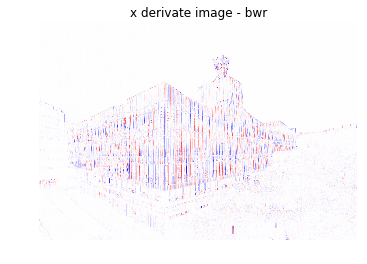

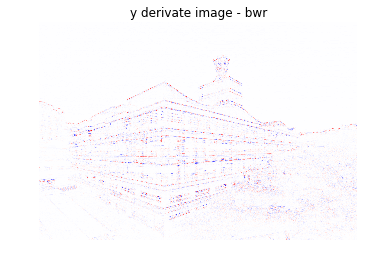

In [4]:
# Define colormap
cmap = 'bwr'  # Diverging Colormap: blue - white - red

# Derivative filter results
dim_dx	= compute_x_derivation(im_gray)
dim_dy	= compute_y_derivation(im_gray)

plt.title('x derivate image - '+cmap)
plt.imshow(dim_dx, cmap=cmap)
plt.axis('off')
plt.show()
plt.title('y derivate image - '+cmap)
plt.imshow(dim_dy, cmap=cmap)
plt.axis('off')
plt.show()

# Plot Absolute Value of Gradient and Direction of Gradient



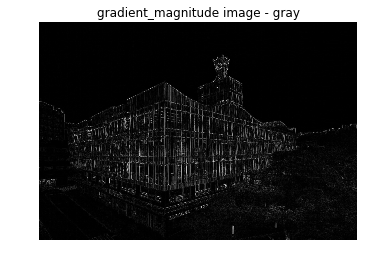

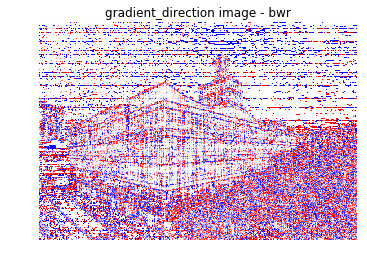

In [5]:
# Image Gradient
grad_im = np.array([dim_dx, dim_dy])

# absolute value of gradient
gradient_magnitude = compute_magnitude_grad(grad_im)
plt.title('gradient_magnitude image - gray')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.show()

# direction of gradient
gradient_direction = compute_grad_direction(grad_im)
plt.title('gradient_direction image - '+cmap)
plt.imshow(gradient_direction, cmap=cmap)
plt.axis('off')
plt.show()

# Result Image with smoothing kernel and own kernel

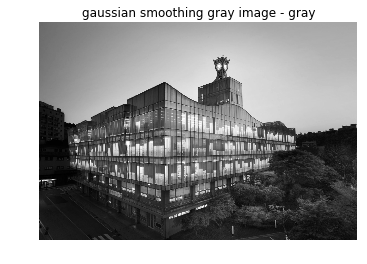

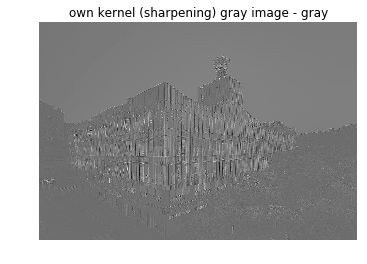

In [6]:
# smoothing kernel
smoothed = smoothing(im_gray)
plt.title('gaussian smoothing gray image - '+'gray')
plt.imshow(smoothed, cmap='gray')
plt.axis('off')
plt.show()


# own kernel
own_image = own(im_gray)
plt.title('own kernel (sharpening) gray image - '+'gray')
plt.imshow(own_image, cmap='gray')
plt.axis('off')
plt.show()

# Now It's COLOR image

Color image is made of 3 channels.

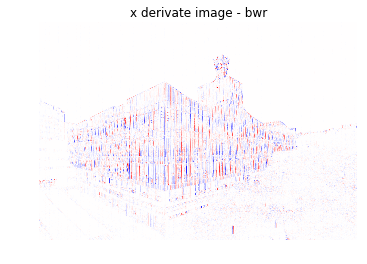

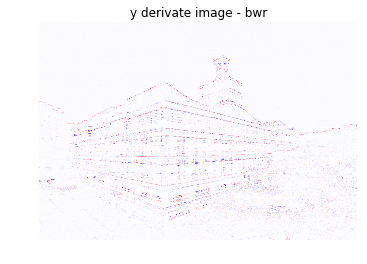

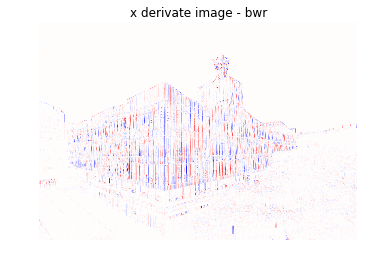

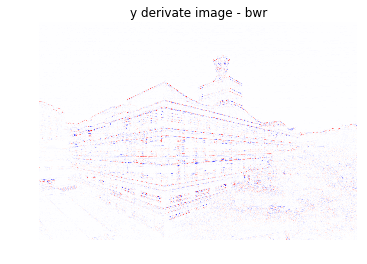

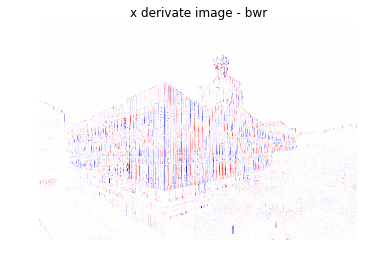

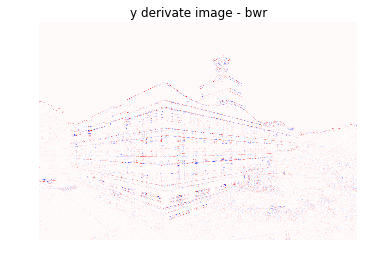

In [7]:
# derivate for color image (3ch)
cr_dim_dx = np.array(im_color,dtype="float64")
cr_dim_dy = np.array(im_color,dtype="float64")
new_im = np.divide(im_color,255.0)
for i in range(3):
    cr_dim_dx[:,:,i] = compute_x_derivation(new_im[:,:,i])
    cr_dim_dy[:,:,i] = compute_y_derivation(new_im[:,:,i])
    plt.title('x derivate image - ' + cmap)
    plt.imshow(cr_dim_dx[:,:,i], cmap=cmap)
    plt.axis('off')
    plt.show()
    plt.title('y derivate image - ' + cmap)
    plt.imshow(cr_dim_dy[:,:,i], cmap=cmap)
    plt.axis('off')
    plt.show()

# 3ch Gradient Direction - Average

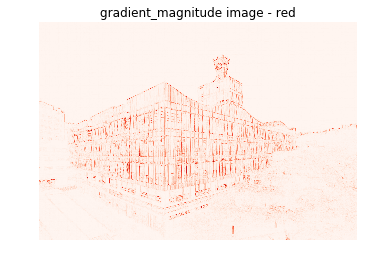

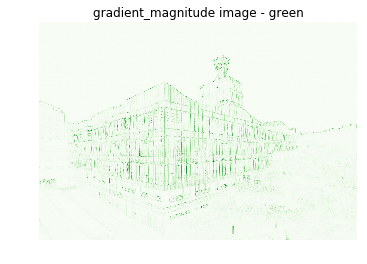

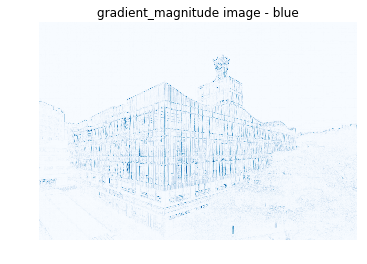

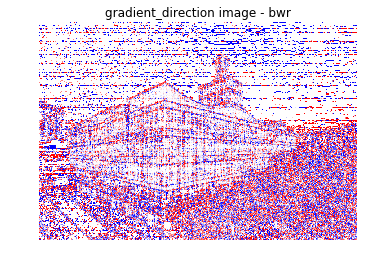

In [8]:
# Image Gradient (3ch)
cr_grad_im = np.array([cr_dim_dx, cr_dim_dy])

# absolute value of gradient (3ch)
gradient_magnitude = compute_magnitude_grad(cr_grad_im[:,:,:,0])
plt.title('gradient_magnitude image - red')
plt.imshow(gradient_magnitude, cmap='Reds')
plt.axis('off')
plt.show()
gradient_magnitude = compute_magnitude_grad(cr_grad_im[:,:,:,1])
plt.title('gradient_magnitude image - green')
plt.imshow(gradient_magnitude, cmap='Greens')
plt.axis('off')
plt.show()
gradient_magnitude = compute_magnitude_grad(cr_grad_im[:,:,:,2])
plt.title('gradient_magnitude image - blue')
plt.imshow(gradient_magnitude, cmap='Blues')
plt.axis('off')
plt.show()

# direction of gradient 3ch -> average -> 1ch
grad_im = np.average(cr_grad_im,axis=3)
gradient_direction = compute_grad_direction(grad_im)
plt.title('gradient_direction image - '+cmap)
plt.imshow(gradient_direction, cmap=cmap)
plt.axis('off')
plt.show()

# Define new functions for color images

In [9]:
# Define new functions for color images
def smoothing_3ch(im):
    smoothing_kernel = np.divide(np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), 16.)
    result = im
    for i in range(3):
        result[:, :, i] = signal.convolve2d(im[:, :, i], smoothing_kernel, boundary='symm', mode='same')
    return result

def own_3ch(im):
    own_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    result = im
    for i in range(3):
        result[:, :, i] = signal.convolve2d(im[:, :, i], own_kernel, boundary='symm', mode='same')
    return result

# 3ch Smoothing and Sharpening

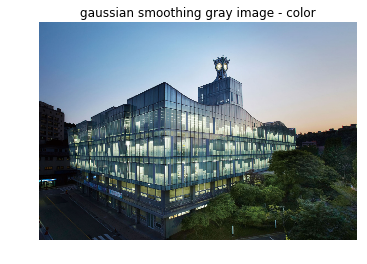

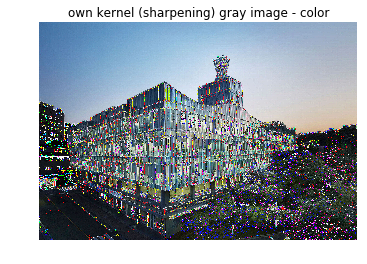

In [10]:
# smoothing kernel (3ch)
smoothed = smoothing_3ch(im_color)
plt.title('gaussian smoothing gray image - '+'color')
plt.imshow(smoothed)
plt.axis('off')
plt.show()


# own kernel
own_image = own_3ch(im_color)
plt.title('own kernel (sharpening) gray image - '+'color')
plt.imshow(own_image)
plt.axis('off')
plt.show()